Identifying Fraud from Enron Email
==================

1. Understanding the Dataset
--------------------------

###  1.1 Data Exploration

In [1]:
import pickle
enron_data = pickle.load(open("final_project_dataset.pkl", 'r'))

poi_count = 0
non_poi_count = 0
for p in enron_data.values():
    if p["poi"]:
        poi_count += 1
    else:
        non_poi_count += 1
        
# Get an example (the first) data point.
eg = enron_data.itervalues().next()

print "Number of data points:", len(enron_data)
print "Number of POIs:", poi_count
print "Number of non-POIs:", non_poi_count
print "Number of features:", len(eg)

def missing_count(enron_data, feature):
    """Return number of missing values of `feature`."""
    count = 0
    for p in enron_data:
        if enron_data[p][feature] == "NaN":
            count += 1
    return count

missing_counts = [(f, missing_count(enron_data, f)) for f in eg]
print "Number of missing features:"
for f,c in sorted(missing_counts, key = lambda x: x[1], reverse = True):
    print "  ", f, ":", c

Number of data points: 146
Number of POIs: 18
Number of non-POIs: 128
Number of features: 21
Number of missing features:
   loan_advances : 142
   director_fees : 129
   restricted_stock_deferred : 128
   deferral_payments : 107
   deferred_income : 97
   long_term_incentive : 80
   bonus : 64
   to_messages : 60
   shared_receipt_with_poi : 60
   from_messages : 60
   from_this_person_to_poi : 60
   from_poi_to_this_person : 60
   other : 53
   salary : 51
   expenses : 51
   exercised_stock_options : 44
   restricted_stock : 36
   email_address : 35
   total_payments : 21
   total_stock_value : 20
   poi : 0


From the results above, we see that there are 146 total number of data points, 18 of which are POI and the rest 128 are non-POI. (Note that there is one outlier data point named `TOTAL` which is actually not a person, as will be explained in Section 1.2).

There are 21 features provided by the `final_project_dataset.pkl`. Among those features, the `loan_advances`, `director_fees`, `restricted_stock_deferred`, `deferral_payments`, `deferred_income` and `long_term_incentive` have more than half of the data points with missing values. (We will also create new features based on email text, as described in Section 2.1).

### 1.2 Outlier Investigation

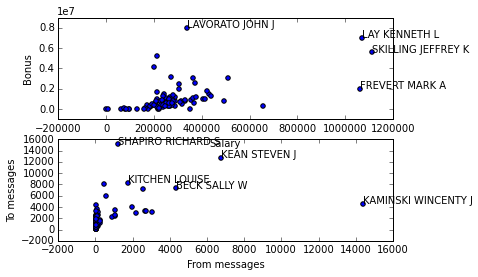

In [2]:
%matplotlib inline
import sys
sys.path.append("../tools")
from feature_format import featureFormat, targetFeatureSplit

enron_data = pickle.load(open("final_project_dataset.pkl", 'r'))
del enron_data["TOTAL"]

features = ["salary", "bonus"]
data = featureFormat(enron_data, features)
plt.subplot(211)
plt.scatter(data[:,0], data[:,1])
for p in enron_data:
    salary = enron_data[p]["salary"]
    bonus = enron_data[p]["bonus"]
    if salary == "NaN" or bonus == "NaN":
        continue
    if (salary > np.percentile(data[:,0], 97) or
        bonus > np.percentile(data[:,1], 97)):
        plt.text(salary, bonus, p)
plt.xlabel("Salary")
plt.ylabel("Bonus")

features = ["from_messages", "to_messages"]
data = featureFormat(enron_data, features)
plt.subplot(212)
plt.scatter(data[:,0], data[:,1])
for p in enron_data:
    from_messages = enron_data[p]["from_messages"]
    to_messages = enron_data[p]["to_messages"]
    if from_messages == "NaN" or to_messages == "NaN":
        continue
    if (from_messages > np.percentile(data[:,0], 97) or
        to_messages > np.percentile(data[:,1], 97)):
        plt.text(from_messages, to_messages, p)
plt.xlabel("From messages")
plt.ylabel("To messages")

We found a data point named `TOTAL`, which is not an individual person but the summary of all other persons in the dataset. It is clearly an outlier for our identifying POI purpose, and therefore we directly remove it from the dataset.

We also try to detect the outliers for some features. In the `bonus` v.s. `salary` plot, we see that there are 4 outliers: `LAY KENNETH L`, `SKILLING JEFFREY K` and `FREVERT MARK A` made salary over $1 million, and `LAVORATO JOHN J` made a bonus $8 million.

Similary, t

2. Feature Selection
-------------------

3. Classification Algorithm
--------------------------

4. Parameter Tuning
------------------

5. Validation Strategy
---------------------

6. Evaluation Metrics
--------------------